In [4]:
%pdb off
%matplotlib inline
from VLM.bzFRInGE.contrib.experiments import *
from VLM.bzFRInGE.contrib.FRINGEBase import ExpBase
from mintpy.cli import view

# from tqdm import tqdm
# import urllib.request

exp = NYC_ALOS_FR
Exp = ExpBase(exp)
os.chdir(Exp.path_wd)
print ('PWD:', os.getcwd())
print (os.getenv('CONDA_PROMPT_MODIFIER'), datetime.now())

Automatic pdb calling has been turned OFF
Got 0 wrapped ifgs (SR)
PWD: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC_FRInGE
(FRInGE)  2023-03-19 16:02:54.743428


## Download DEM

In [5]:
S1, N1 = int(np.floor(Exp.SNWE[0])), int(np.ceil(Exp.SNWE[1]))
W1, E1 = int(np.floor(Exp.SNWE[2])), int(np.ceil(Exp.SNWE[3]))
W2, E2 = str(np.abs(W1)).zfill(3), str(np.abs(E1)).zfill(3)

In [10]:
os.chdir(Exp.path_dems)

cmd = f'dem.py -a stitch -b {S1} {N1} {W1} {E1} -r -s 1 -c'
print (cmd)

!{cmd}

!rm demLat*.dem demLat*.dem.xml demLat*.dem.vrt

dem.py -a stitch -b 40 41 -75 -73 -r -s 1 -c
This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
curl -n  -L -c $HOME/.earthdatacookie -b $HOME/.earthdatacookie -k -f -O https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/N40W075.SRTMGL1.hgt.zip
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   498    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   291    0   291    0     0    195      0 --:--:--  0:00:01 --:--:--   288
  0   267    0     0    0     0      0      0 --:--:--  0:00:

## Prep RAW

In [50]:
cmd = f'prepRawALOS.py -i {Exp.path_wd}/RAW -o ./SLC'
print (cmd)
!{cmd}

prepRawALOS.py -i /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/RAW -o ./SLC
unpackFrame_ALOS_raw.py -i /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/RAW/20071215 -o /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20071215 -f  fbs2fbd 
unpackFrame_ALOS_raw.py -i /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/RAW/20080501 -o /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20080501
unpackFrame_ALOS_raw.py -i /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/RAW/20091220 -o /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20091220 -f  fbs2fbd 
unpackFrame_ALOS_raw.py -i /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/RAW/20100622 -o /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20100622
unpackFrame_ALOS_raw.py -i /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/RAW/20100922 -o /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20100922
unpackFrame_ALOS_raw.py -i /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/RAW/20101107 -o /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20101107
unpackFrame_ALOS_raw.py -i /u/leffe-data2/buzzanga/data/VLM/A

In [47]:
# you need to manually edit this file to remove the source ~/.bash_profile
# the source removes the conda environment which has needed paths. source itself has some x problem
!sh ./run_unPackALOS

./run_unPackALOS: line 1: unpackFrame_ALOS_raw.py: command not found
./run_unPackALOS: line 2: unpackFrame_ALOS_raw.py: command not found
./run_unPackALOS: line 3: unpackFrame_ALOS_raw.py: command not found
./run_unPackALOS: line 4: unpackFrame_ALOS_raw.py: command not found
./run_unPackALOS: line 5: unpackFrame_ALOS_raw.py: command not found
./run_unPackALOS: line 6: unpackFrame_ALOS_raw.py: command not found
./run_unPackALOS: line 7: unpackFrame_ALOS_raw.py: command not found
./run_unPackALOS: line 8: unpackFrame_ALOS_raw.py: command not found


In [ ]:
## Not sure where this file is / don't think it's needed
# ! sh ../download/create_raw_alos.txt

## run stackStripMap

In [16]:
!stackStripMap.py -h

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
usage: stackStripMap.py [-h] -s SLCDIR [-x BBOX] [-w WORKDIR] -d DEM
                        [-m REFERENCEDATE] [-t DTTHR] [-b DBTHR] [-a ALKS]
                        [-r RLKS] [-S SENSOR] [-u UNWMETHOD] [-f FILTSTRENGTH]
                        [-L FL] [-H FH] [-B BANDWIDTH]
                        [--filter_sigma_x FILTERSIGMAX]
                        [--filter_sigma_y FILTERSIGMAY]
                        [--filter_size_x FILTERSIZEX]
                        [--filter_size_y FILTERSIZEY]
                        [--filter_kernel_rotation FILTERKERNELROTATION]
         

In [55]:
## make the config files
cmd  = f'stackStripMap.py -s {Exp.path_wd}/SLC '
cmd += f'-x "{Exp.SNWEs}" '
cmd += f'-d {Exp.path_dems}/demLat_N{S1}_N{N1}_Lon_W{W2}_W{E2}.dem.wgs84 '
cmd += f'-w {Exp.path_wd} '
cmd += f'-W interferogram '
cmd += '-t 5000 '  # max temporal baseline (days)
cmd += '-f 0.6 '   # goldstein filter strength
cmd += f'-a {Exp.naz} -r {Exp.nrg} '
cmd += f'-u snaphu -useGPU'

print (cmd)
!{cmd}

stackStripMap.py -s /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC -x "40.53 40.82296 -74.17 -73.756498" -d /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/DEM/demLat_N40_N41_Lon_W075_W073.dem.wgs84 -w /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC -W interferogram -t 5000 -f 0.6 -a 9 -r 4 -u snaphu -useGPU
This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
dirs =  ['/u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20071215', '/u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20080501', '/u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20091220', '/u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/SLC/20100622', '/u/leffe-data2/buzzanga/data/VLM/ALOS/NY

Now run them in the terminal!

## Try FRInGE

In [10]:
os.path.exists(f'{Exp.path_wd}/slcs')

False

In [11]:
# need this for geom; creates coreg_stack, slcs?
cmd  = f'tops2vrt.py -i {Exp.path_wd}/merged -s {Exp.path_wd}/coreg_stack '
cmd += f'-g {Exp.path_wd}/geometry -c {Exp.path_wd}/slcs -B {Exp.SNWEs} '

print (cmd)
# !{cmd}

tops2vrt.py -i /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC_FRInGE/merged -s /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC_FRInGE/coreg_stack -g /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC_FRInGE/geometry -c /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC_FRInGE/slcs -B 40.53 40.82296 -74.17 -73.756498 


## Quick View an IFG

In [86]:
path_igrams = f'{Exp.path_wd}/Igrams'
path_wrap = op.join(path_igrams, '20071215_20080501', 'filt_20071215_20080501.int')
path_unw  = op.join(path_igrams, '20071215_20080501/filt_20071215_20080501_snaphu.unw')

run view.py in MintPy version 1.4.1-4, date 2022-09-04
input file is isce .int file: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/filt_20071215_20080501.int in complex64 format
file size in y/x: (3072, 929)
input dataset: "['phase']"
num of datasets in file filt_20071215_20080501.int: 2
datasets to exclude (0):
[]
datasets to display (1):
['phase']
data   coverage in y/x: (0, 0, 929, 3072)
subset coverage in y/x: (0, 0, 929, 3072)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: cmo.phase
figure title: filt_20071215_20080501.int
figure size : [3.02, 8.00]
reading data ...
data    range: [-3.141585, 3.141585] radian
display range: [-3.14, 3.14] radian
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


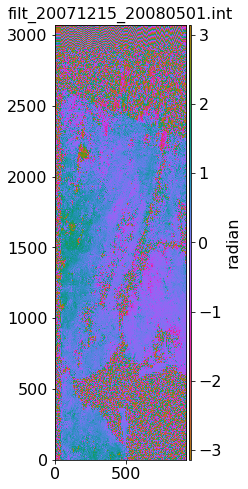

In [80]:
%matplotlib inline
cmd = f'view.py {path_wrap} phase --flip-ud -v -3.14 3.14 -c cmo.phase'
obj = viewer(cmd)
obj.configure(); obj.plot()

run view.py in MintPy version 1.4.1-4, date 2022-09-04
input file is isce .int file: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/filt_20071215_20080501.int in complex64 format
file size in y/x: (3072, 929)
input dataset: "['magnitude']"
num of datasets in file filt_20071215_20080501.int: 2
datasets to exclude (0):
[]
datasets to display (1):
['magnitude']
data   coverage in y/x: (0, 0, 929, 3072)
subset coverage in y/x: (0, 0, 929, 3072)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: jet
figure title: filt_20071215_20080501.int
figure size : [3.02, 8.00]
reading data ...
data    range: [0.0, 5059965.5] 1
display range: [-3.141592653589793, 3.141592653589793] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


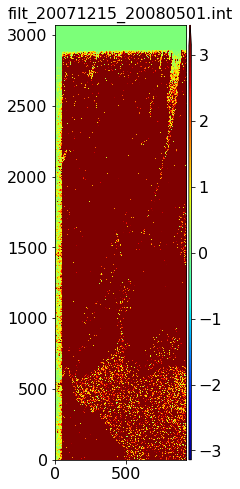

In [83]:
%matplotlib inline
cmd = f'view.py {path_wrap} magnitude --flip-ud'
obj = viewer(cmd)
obj.configure(); obj.plot()

run view.py in MintPy version 1.4.1-4, date 2022-09-04
input file is isce .unw file: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/filt_20071215_20080501_snaphu.unw in float32 format
file size in y/x: (3072, 929)
input dataset: "['phase']"
num of datasets in file filt_20071215_20080501_snaphu.unw: 2
datasets to exclude (0):
[]
datasets to display (1):
['phase']
data   coverage in y/x: (0, 0, 929, 3072)
subset coverage in y/x: (0, 0, 929, 3072)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: roma
figure title: filt_20071215_20080501_snaphu.unw - phase
figure size : [3.02, 8.00]
reading data ...
data    range: [-139.35736, 96.15209] radian
display range: [-139.35736, 96.15209] radian
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


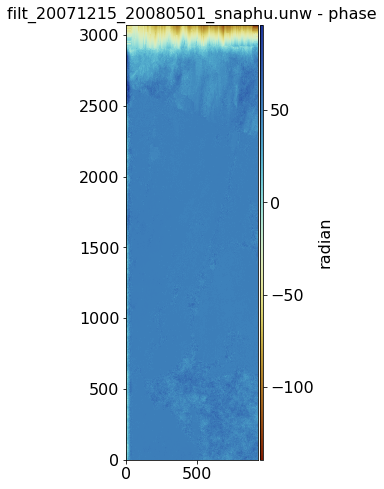

In [90]:
%matplotlib inline
cmd = f'view.py {path_unw} phase --flip-ud -c roma'#velocity -u mm -c roma --noverbose -v -5 5 --figsize {fs[0]} {fs[1]} '
obj = viewer(cmd)
obj.configure(); obj.plot()

## Mask

### Water

#### DL SWBD

In [92]:
# download the big mask
os.chdir(Exp.path_masks)

cmd  = f'wbd.py {S1} {N1} {W1} {E1}'

print (cmd)
!{cmd}
# does NOT work:
# cmd = f'geocodeGdal.py -f swbdLat_N36_N38_Lon_W077_W075.wbd -l ../merged/geom_reference/lat.rdr.full -L ../merged/geom_reference/lon.rdr.full -b {Exp.SNWEs}' 

wbd.py 40 41 -75 -73
This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
command = curl -n  -L -c $HOME/.earthdatacookie -b $HOME/.earthdatacookie -k -f -O https://e4ftl01.cr.usgs.gov/MEASURES/SRTMSWBD.003/2000.02.11/N40W075.SRTMSWBD.raw.zip
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   501    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   294    0   294    0     0    210      0 --:--:--  0:00:01 --:--:--     0
  0   269    0     0    0     0      0      0 --:--:--  0:00:02 --:--:-- 

run view.py in MintPy version 1.4.1-4, date 2022-09-04
input file is isce .wbd file: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/masks/swbdLat_N40_N41_Lon_W075_W073.wbd in uint8 format
file size in y/x: (3600, 7200)
num of datasets in file swbdLat_N40_N41_Lon_W075_W073.wbd: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 7200, 3600)
subset coverage in y/x: (0, 0, 7200, 3600)
data   coverage in lat/lon: (-75.00013888888888, 41.00013888888889, -73.00013888888888, 40.00013888888889)
subset coverage in lat/lon: (-75.00013888888888, 41.00013888888889, -73.00013888888888, 40.00013888888889)
------------------------------------------------------------------------
colormap: binary
figure title: swbdLat_N40_N41_Lon_W075_W073.wbd
figure size : [10.00, 4.00]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 255] 1
display range: [-127.5, 382.5] 1
display data in transparency: 1.0

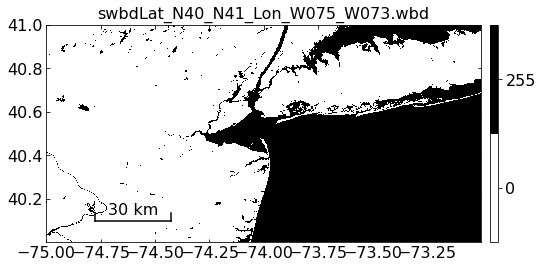

In [93]:
## plot the raw SWBD mask
S1s, N1s, W1s, E1s = [str(i).zfill(3 if i<0 else 2).replace('-', '0') for i in [S1, N1, W1, E1]]


cmd = f'view.py {Exp.path_masks}/swbdLat_N{S1s}_N{N1s}_Lon_W{W1s}_W{E1s}.wbd -c binary' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [ ]:
use_OSM  = False

if use_OSM:
    base = 'OSM_wmask'
    src0 = op.join(Exp.path_crops, f'{base}.tif')
    msk  = '--nonzero'
else:
    base = 'swbd'
    src0 = glob.glob(op.join(Exp.path_masks, f'{base}*.wbd'))[0]
    msk  = '-M 200'

In [ ]:
# use ISCE files to radarcode full mask... takes like 10 hours
path_water_full = op.join(Exp.path_masks, f'{base}_isce.h5')
geom_ref        = op.join(Exp.path_wd, 'merged', 'geom_reference')

cmd  = f'geocode.py {src0} -o {path_water_full}  --geo2radar --nprocs 24 --ram 36 '
cmd += f'--lat-file {geom_ref}/lat.rdr.full --lon-file {geom_ref}/lon.rdr.full'

# cmd  = f'geocode.py {src0} -o {dst} -l {Exp.path_geom_mp} --geo2radar ' # if mintpy geom exists

print (cmd)
# !{cmd}

In [ ]:
## plot the geocoding results
cmd = f'view.py {path_water_full} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [ ]:
## then make a mask from radarcoded waterMask; -1 is water so mask BELOW (-m 0)
# newer looks like 0/255 values, so mask ABOVE (-M 200)
src             = path_water_full
path_wmask_full = op.join(Exp.path_masks, 'waterMask_isce.h5')

cmd = f'generate_mask.py {src} -o {path_wmask_full} {msk}'

print (cmd)
# !{cmd}

In [ ]:
## rename dataset for mintpy
with h5py.File(path_wmask_full, 'r+') as h5:
    mask = h5['mask'][:]
    dset = h5.create_dataset('waterMask', data=mask, dtype=bool)
    del h5['mask']

In [ ]:
## plot the masking results
cmd = f'view.py {path_wmask_full} -c binary' 
obj = viewer(cmd)
obj.configure(); obj.plot()

## Prep MintPy

In [97]:
args  = f'-f {Exp.path_wd}/Igrams/*/filt_*.unw '
args += f'-m {Exp.path_wd}/Igrams/20071215_20080501/referenceShelve/data.dat '
args += f'-b {Exp.path_wd}/baseline/ '
args += f'-g {Exp.path_wd}/geom_reference'

cmd = f'prep_isce.py {args}'
print (cmd)
!{cmd}

prep_isce.py -f /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/*/filt_*.unw -m /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/referenceShelve/data.dat -b /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/baseline/ -g /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/geom_reference
['/u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/referenceShelve/data.rsc'] exists and is newer than ['/u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/referenceShelve/data.dat'] --> skip.
preparing RSC file for geometry files
read perp baseline time-series from /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/baseline/
preparing RSC file for: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/filt_20071215_20080501_snaphu.unw
preparing RSC file for: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20091220/filt_20071215_20091220_snaphu.unw
preparing RSC file for: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20100622/filt_20071215_2010

## Run MintPy?

## Plot MintPy

view.py /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/MintPy_9alks_4rlks_0_0/NYBP_Base/geo/geo_velocity.h5 velocity -u mm -c roma --noverbose -v -5 5 --figsize 30 10


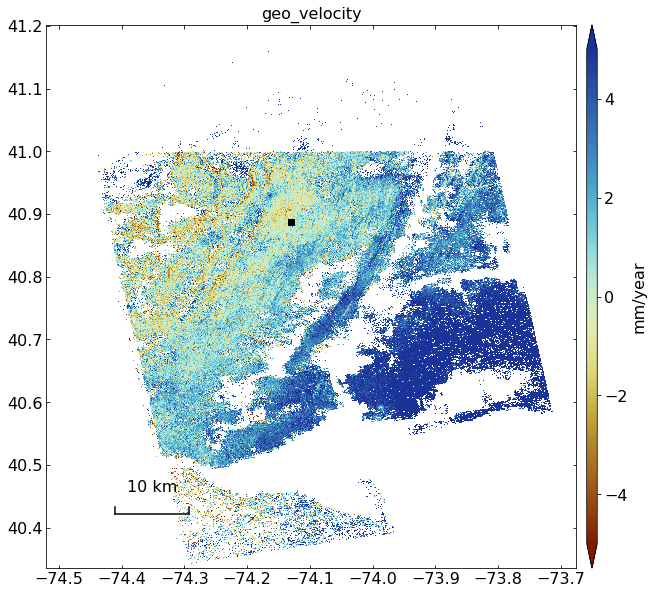

In [29]:
%matplotlib inline
fs  = '30 10'.split()

cmd = f'{Exp.path_vlos_geo} velocity -u mm -c roma --noverbose -v -5 5 --figsize {fs[0]} {fs[1]} '
# cmd = f'{cmd} -m {Exp.path_mask_mp_geo} ' # waterMask only; leave off for tcoh mask
view.main(cmd.split())



# cmd = f'view.py {Exp.path_vlos_geo} residue -u mm -c roma_r --noverbose --figsize {fs[0]} {fs[1]} '
# cmd = f'{cmd} -m {Exp.path_mask_mp_geo} ' # waterMask only; leave off for tcoh mask

# obj = viewer(cmd)
# obj.configure(); obj.plot()